In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [15]:
batch_size = 128
imgHeight = 180
imgWidth = 180

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset='training',
    image_size = (imgHeight, imgWidth),
    batch_size =batch_size,
    seed = 123
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (imgHeight, imgWidth),
    batch_size=batch_size,
    seed=123
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [19]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(128, 180, 180, 3)
(128,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [21]:
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(imgHeight, imgWidth, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [22]:
num_classes = 5

model = tf.keras.Sequential([
    data_augumentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [ ]:
epochs = 5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/5
23/23 [==============================] - 85s 4s/step - loss: 1.8420 - accuracy: 0.1924 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 2/5
23/23 [==============================] - 79s 3s/step - loss: 1.6094 - accuracy: 0.1863 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 3/5
23/23 [==============================] - 80s 3s/step - loss: 1.6094 - accuracy: 0.1863 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 4/5
23/23 [==============================] - 81s 4s/step - loss: 1.6094 - accuracy: 0.1863 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 5/5
23/23 [==============================] - ETA: 0s - loss: 1.6094 - accuracy: 0.1863

Text(0.5, 1.0, 'Traning and Validation Loss')

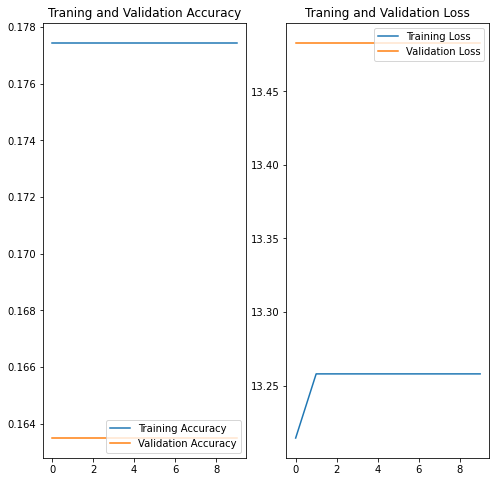

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Traning and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Traning and Validation Loss')